In [6]:
# Лабораторная работа № 8
### вариант № 2   Лила.В.Я
### группа: РИМ-101211                

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pydot_ng as pydot
import numpy.random as rand
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # здесь необходимо установить модули командами
from keras.layers import Dense      # pip install keras --user
from keras.layers import LSTM       # pip install tensorflow --user
from keras.layers import Dropout

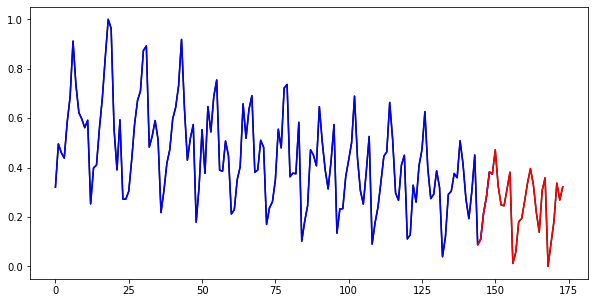

In [2]:
file = h5py.File('./files/Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = Fort
scaler = MinMaxScaler(feature_range=(0, 1)) # подгоняет под масштаб по оси OY от 0 до 1
F = scaler.fit_transform(F) # так как функция активации слоя LSTM корректно обрабатывает значения только в данном диапазоне
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()

In [3]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr, length=6, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape)

(144, 6, 1)
(144, 1, 6)
(144, 1)


In [4]:
from keras.utils.vis_utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=20, input_shape=(1, 6))) # 20 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# plot_model(model, to_file='model.png') # рисунок полученной сети

In [5]:
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(1, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# plot_model(model, to_file='model.png')

In [6]:
model.fit(xx, yy, epochs = 100) # 100 эпох по 144 точки

Epoch 1/100
5/5 [==============================] - 11s 7ms/step - loss: 0.2496
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.2156
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1993
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1932
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1937
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1459
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1460
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1132
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0907
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0673
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 13/100
5/5 [==============================] - 0s 6ms/s

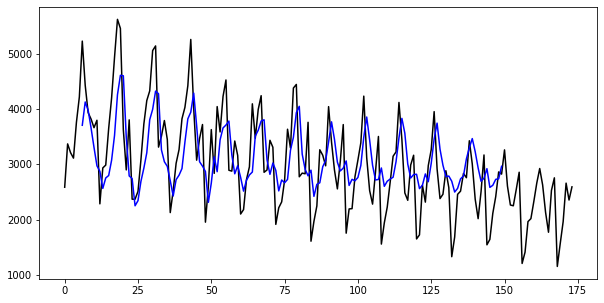

In [7]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[6:150],trainPredict, 'b')
plt.show()

In [8]:
data_gen = TimeseriesGenerator(F_test, F_test, length=6, sampling_rate=1,batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape)

(24, 1, 6)
(24, 1)


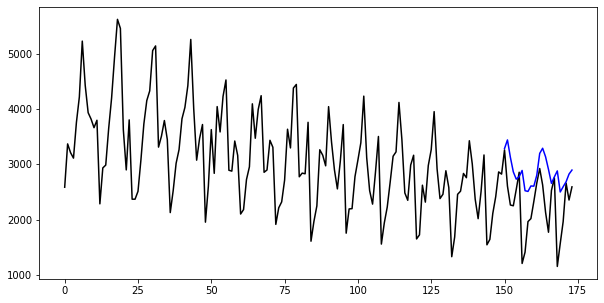

In [9]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

Теперь самостоятельно попробуем подобрать такую модель и ее параметры (число нейронов в слоях, общая структура, коэффициенты Dropout, число предыдущих точек для прогноза, число наблюдений для обучения и т.д.), чтобы получить наиболее удачный результат. Длина прогноза должна быть в 24 отсчета.

In [10]:
F_test = F[138:]

data_gen = TimeseriesGenerator(F_tr, F_tr, length=12, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 138 точек обучения, прогноз 1 точки по 12 прошлым точкам
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape)

model = Sequential() # слои соединены последовательно
model.add(LSTM(units=70, input_shape=(1, 12))) # 70 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(units=70, return_sequences=True, input_shape=(1, 12)))
model.add(Dropout(0.01))
model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(0.01))
model.add(LSTM(units=70))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(xx, yy, epochs = 80) # 80 эпох

data_gen = TimeseriesGenerator(F_test, F_test, length=12, sampling_rate=1,batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 24 наблюдениям
print(yy.shape)



(138, 12, 1)
(138, 1, 12)
(138, 1)
Epoch 1/80
5/5 [==============================] - 3s 6ms/step - loss: 0.2173
Epoch 2/80
5/5 [==============================] - 0s 5ms/step - loss: 0.1904
Epoch 3/80
5/5 [==============================] - 0s 6ms/step - loss: 0.1717
Epoch 4/80
5/5 [==============================] - 0s 6ms/step - loss: 0.1191
Epoch 5/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0716
Epoch 6/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0284
Epoch 7/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0429
Epoch 8/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0400
Epoch 9/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 10/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0281
Epoch 11/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0273
Epoch 12/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0270
Epoch 13/80
5/5 [=====================

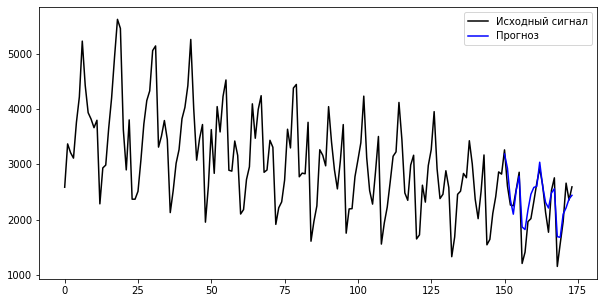

In [11]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k', label='Исходный сигнал')
plt.plot(np.r_[150:174],testPredict, 'b', label='Прогноз')
plt.legend()
plt.show()

Построим прогноз на 256 точек для следующего модельного временного ряда и самостоятельно выберите для него параметры

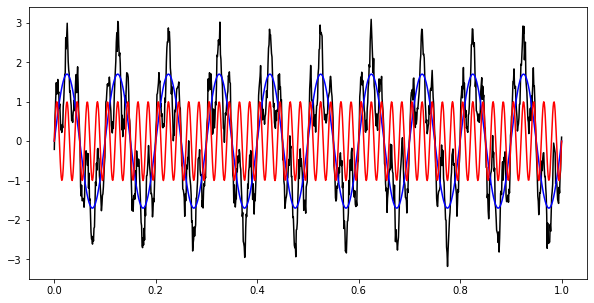

In [12]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

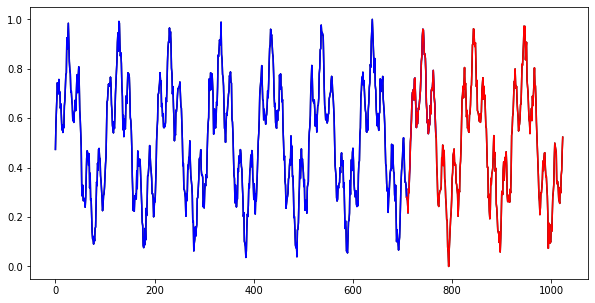

(708, 60, 1)
(708, 1, 60)
(708, 1)
Epoch 1/20
23/23 [==============================] - 3s 6ms/step - loss: 0.2552
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0616
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0392
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 7/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 8/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 9/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 10/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 11/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 13/20
23

In [13]:
F_ras = np.array(F) # переводим исходный массив F в расчетный массив F_ras
F_ras = F_ras.reshape(-1, 1) # делаем из одномерного масства двумерный

PR_T = 256 # Количество прогнозируемых точек
PR_past = 60 #  по скольким предыдущим точкам проводим обучение
neir = 50 # Количество нейронов в цепочке
pogr=0.01 # Допустимое отклонение 
epo = 20 # Количество эпох

scaler = MinMaxScaler(feature_range=(0, 1)) # подгоняет под масштаб по оси OY от 0 до 1
F_ras = scaler.fit_transform(F_ras) # так как функция активации слоя LSTM корректно обрабатывает значения только в данном диапазоне
F_tr = F_ras[:len(F_ras)-PR_T]
F_test = F_ras[len(F_ras)-PR_T-PR_past:]
plt.figure(figsize = (10, 5))
plt.plot(F_ras, 'k')
plt.plot(np.r_[:len(F_ras)-PR_T],F_tr, 'b')
plt.plot(np.r_[len(F_ras)-PR_T-PR_past:len(F_ras)],F_test, 'r')
plt.show()

data_gen = TimeseriesGenerator(F_tr, F_tr, length=PR_past, sampling_rate=1, batch_size=len(F_ras)-PR_T)
batch_0 = data_gen[0]
x, y = batch_0 
print(x.shape)
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape)
print(yy.shape)

model = Sequential() # слои соединены последовательно
model.add(LSTM(units=neir, input_shape=(1, 60)))
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(units=neir, return_sequences=True, input_shape=(1, 60)))
model.add(Dropout(pogr))
model.add(LSTM(units=neir, return_sequences=True))
model.add(Dropout(pogr))
model.add(LSTM(units=neir))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(xx, yy, epochs = epo)

data_gen = TimeseriesGenerator(F_test, F_test, length=PR_past, sampling_rate=1,batch_size=len(F_ras)-PR_T)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 256 точек по 60 наблюдениям
print(yy.shape) #

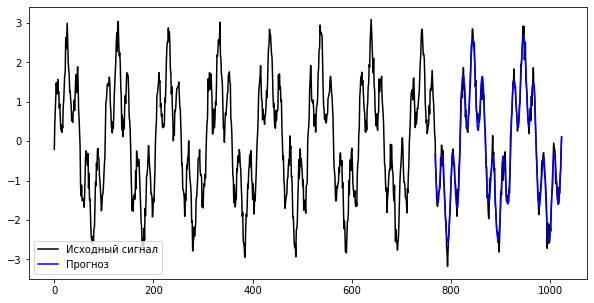

In [14]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k',label='Исходный сигнал')
plt.plot(np.r_[len(F_ras)-PR_T:len(F_ras)],testPredict, 'b',label='Прогноз')
plt.legend()
plt.show()

==========================================================

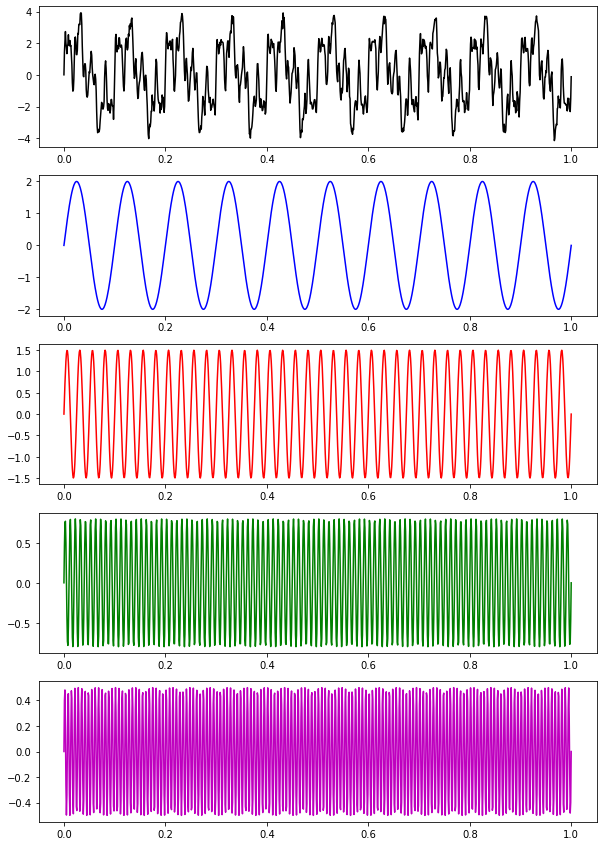

In [15]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

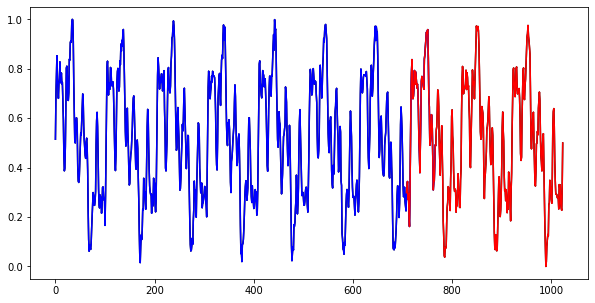

(708, 60, 1)
(708, 1, 60)
(708, 1)
Epoch 1/10
23/23 [==============================] - 3s 6ms/step - loss: 0.2903
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.1449
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0607
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0492
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 8/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 9/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 10/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0055
(256, 1, 60)
(256, 1)


In [16]:
F_ras = np.array(F) # переводим исходный массив F в расчетный массив F_ras
F_ras = F_ras.reshape(-1, 1) # делаем из одномерного масства двумерный

PR_T = 256 # Количество прогнозируемых точек
PR_past = 60 #  по скольким предыдущим точкам проводим обучение
neir = 20 # Количество нейронов в цепочке
pogr=0.1 # Допустимое отклонение
epo = 10 # Количество эпох

scaler = MinMaxScaler(feature_range=(0, 1)) # подгоняет под масштаб по оси OY от 0 до 1
F_ras = scaler.fit_transform(F_ras) # так как функция активации слоя LSTM корректно обрабатывает значения только в данном диапазоне
F_tr = F_ras[:len(F_ras)-PR_T]
F_test = F_ras[len(F_ras)-PR_T-PR_past:]
plt.figure(figsize = (10, 5))
plt.plot(F_ras, 'k')
plt.plot(np.r_[:len(F_ras)-PR_T],F_tr, 'b')
plt.plot(np.r_[len(F_ras)-PR_T-PR_past:len(F_ras)],F_test, 'r')
plt.show()

data_gen = TimeseriesGenerator(F_tr, F_tr, length=PR_past, sampling_rate=1, batch_size=len(F_ras)-PR_T)
batch_0 = data_gen[0]
x, y = batch_0 
print(x.shape) 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

model = Sequential() # слои соединены последовательно
model.add(LSTM(units=neir, input_shape=(1, PR_past)))
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(units=neir, return_sequences=True, input_shape=(1, PR_past)))
model.add(Dropout(pogr))
model.add(LSTM(units=neir, return_sequences=True))
model.add(Dropout(pogr))
model.add(LSTM(units=neir))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(xx, yy, epochs = epo)

data_gen = TimeseriesGenerator(F_test, F_test, length=PR_past, sampling_rate=1,batch_size=len(F_ras)-PR_T)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 256 точек по 60 наблюдениям
print(yy.shape) #

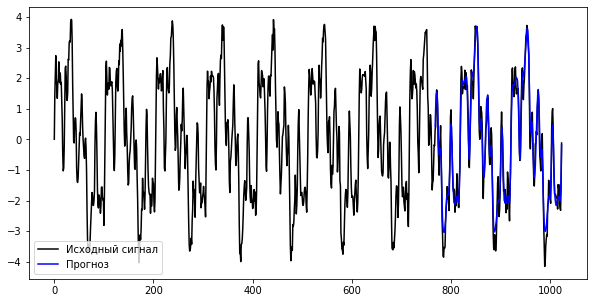

In [17]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k',label='Исходный сигнал')
plt.plot(np.r_[len(F_ras)-PR_T:len(F_ras)],testPredict, 'b',label='Прогноз')
plt.legend()
plt.show()